Загрузить данные Market_Basket_Optimisation.csv

In [1]:
import pandas as pd
data = pd.read_csv('Market_Basket_Optimisation.csv', sep=',')
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

Визуализировать данные (отразить на гистограммах относительную и фактическую частоту встречаемости для 20 наиболее популярных товаров).

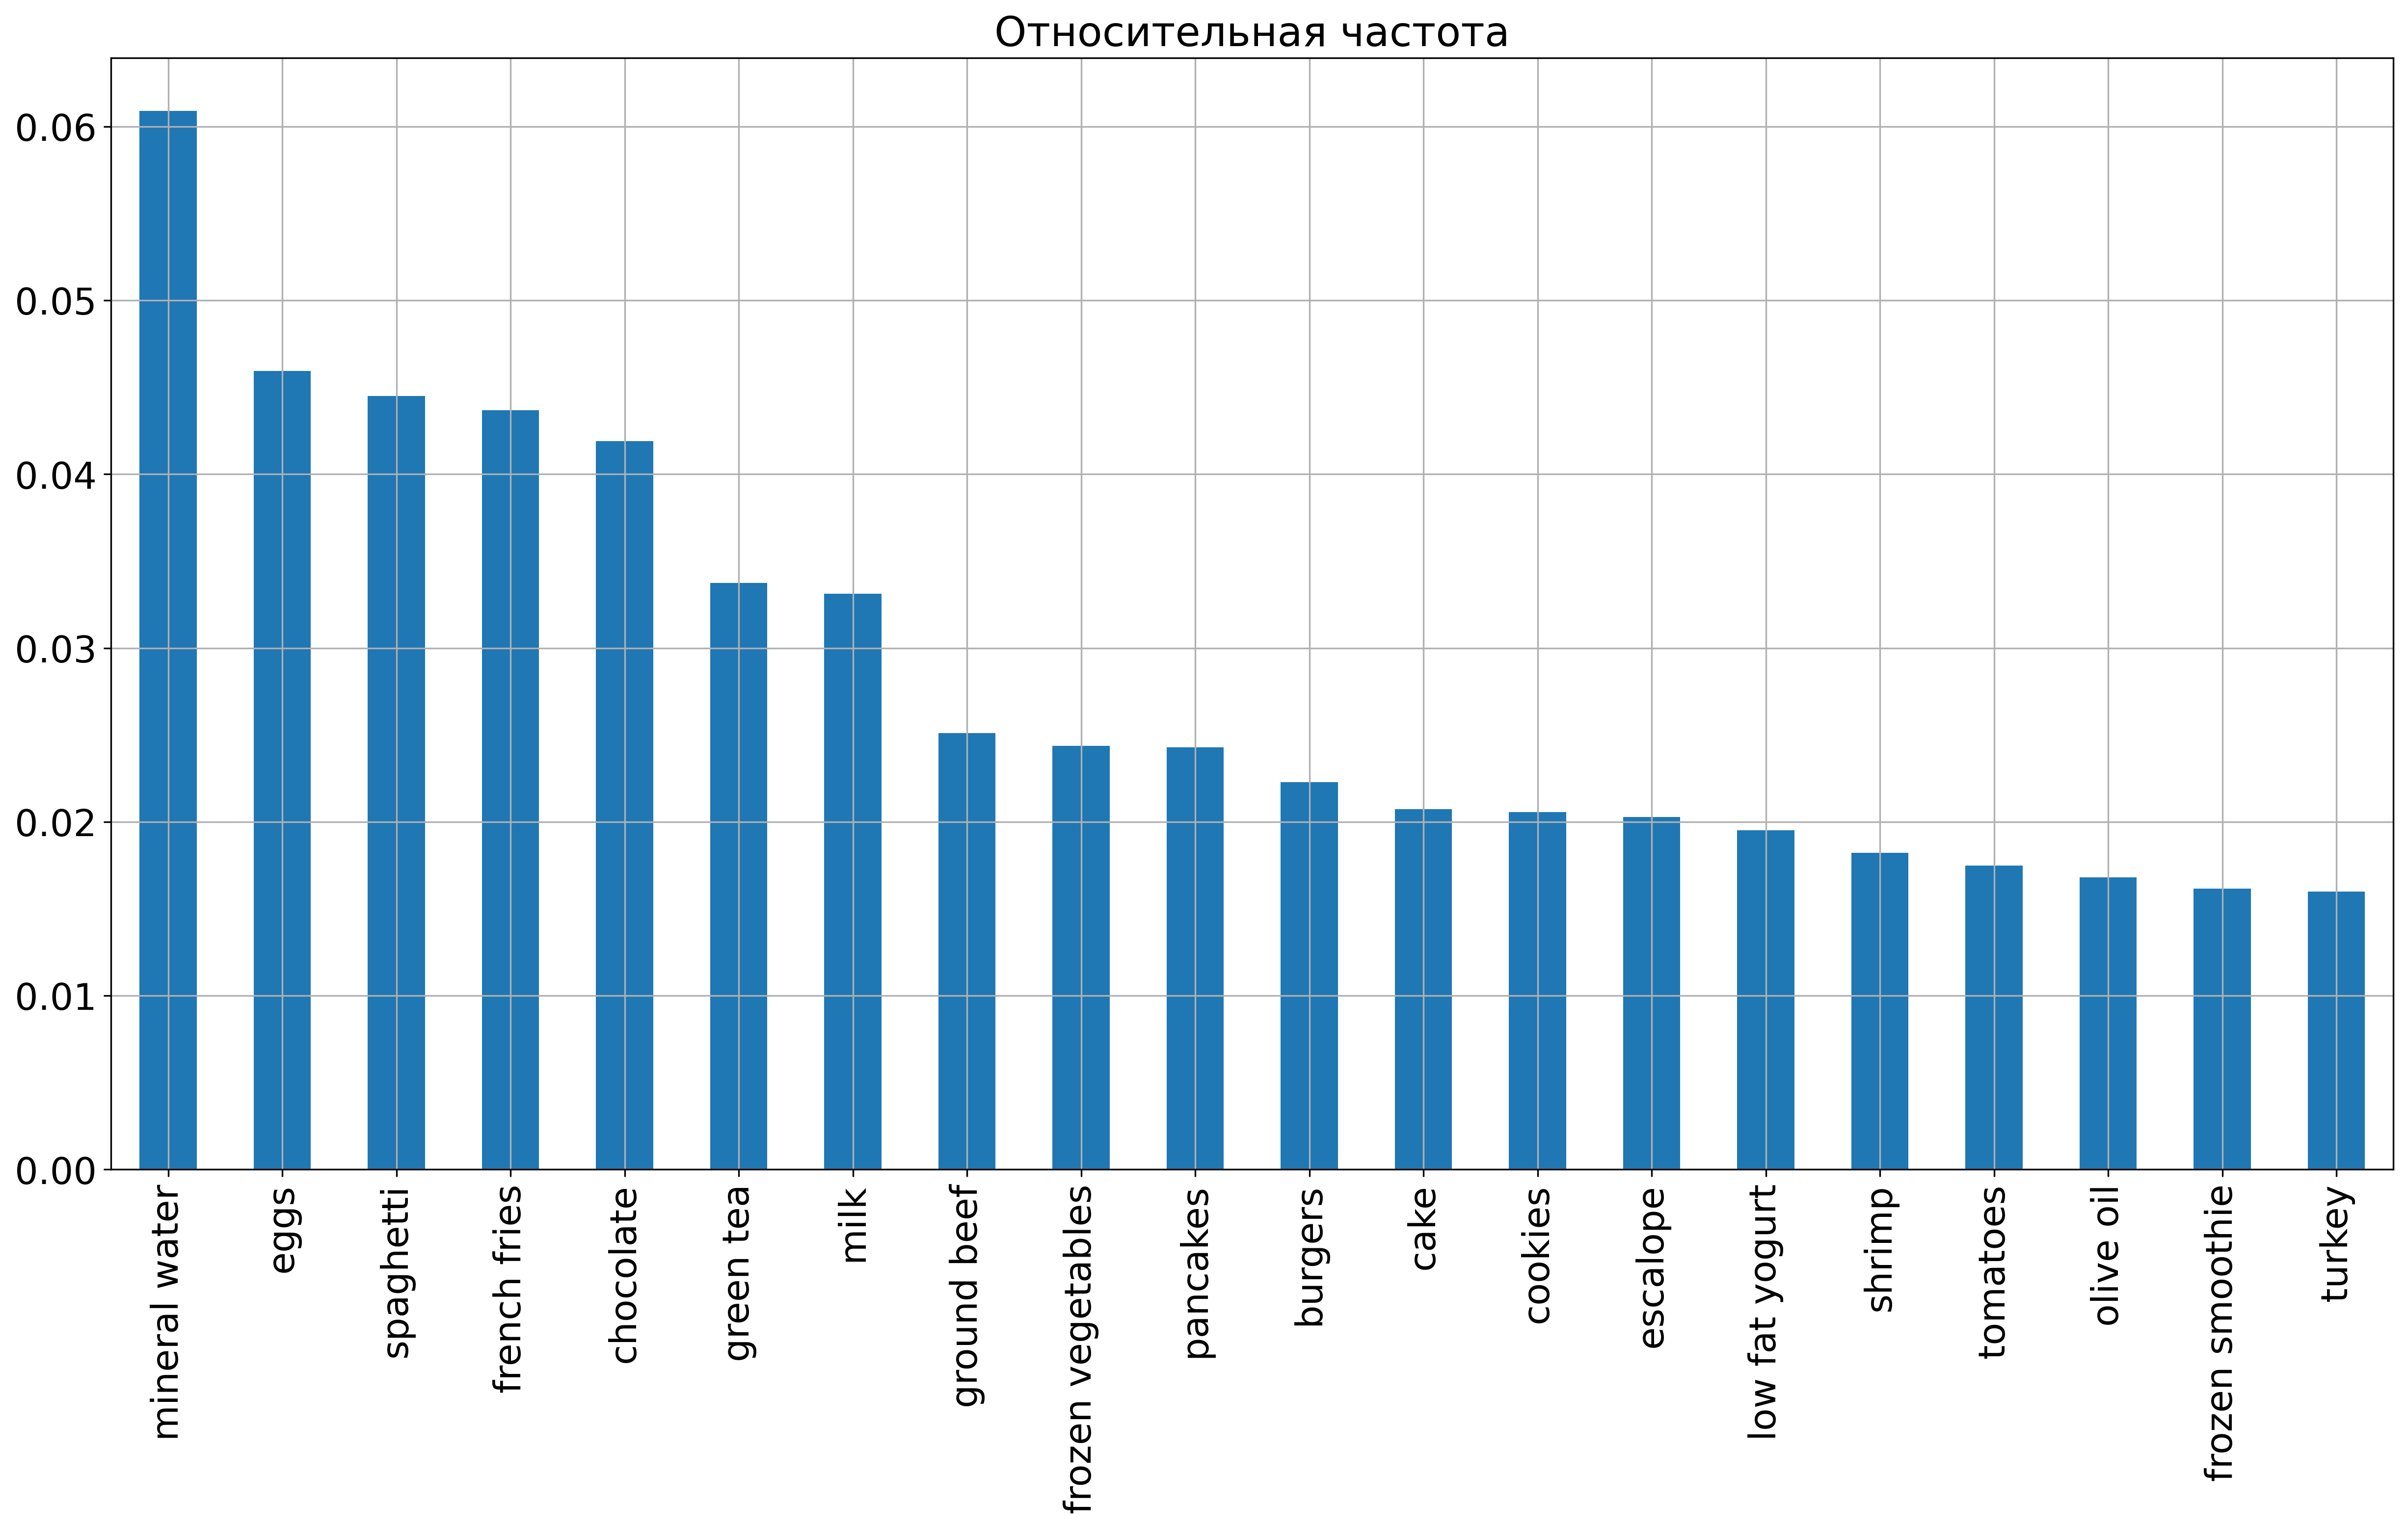

In [2]:
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(20,10), dpi=300)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Относительная частота", size=20)
df.stack().value_counts(normalize=True).head(20).plot(kind='bar')
plt.grid()
plt.show()

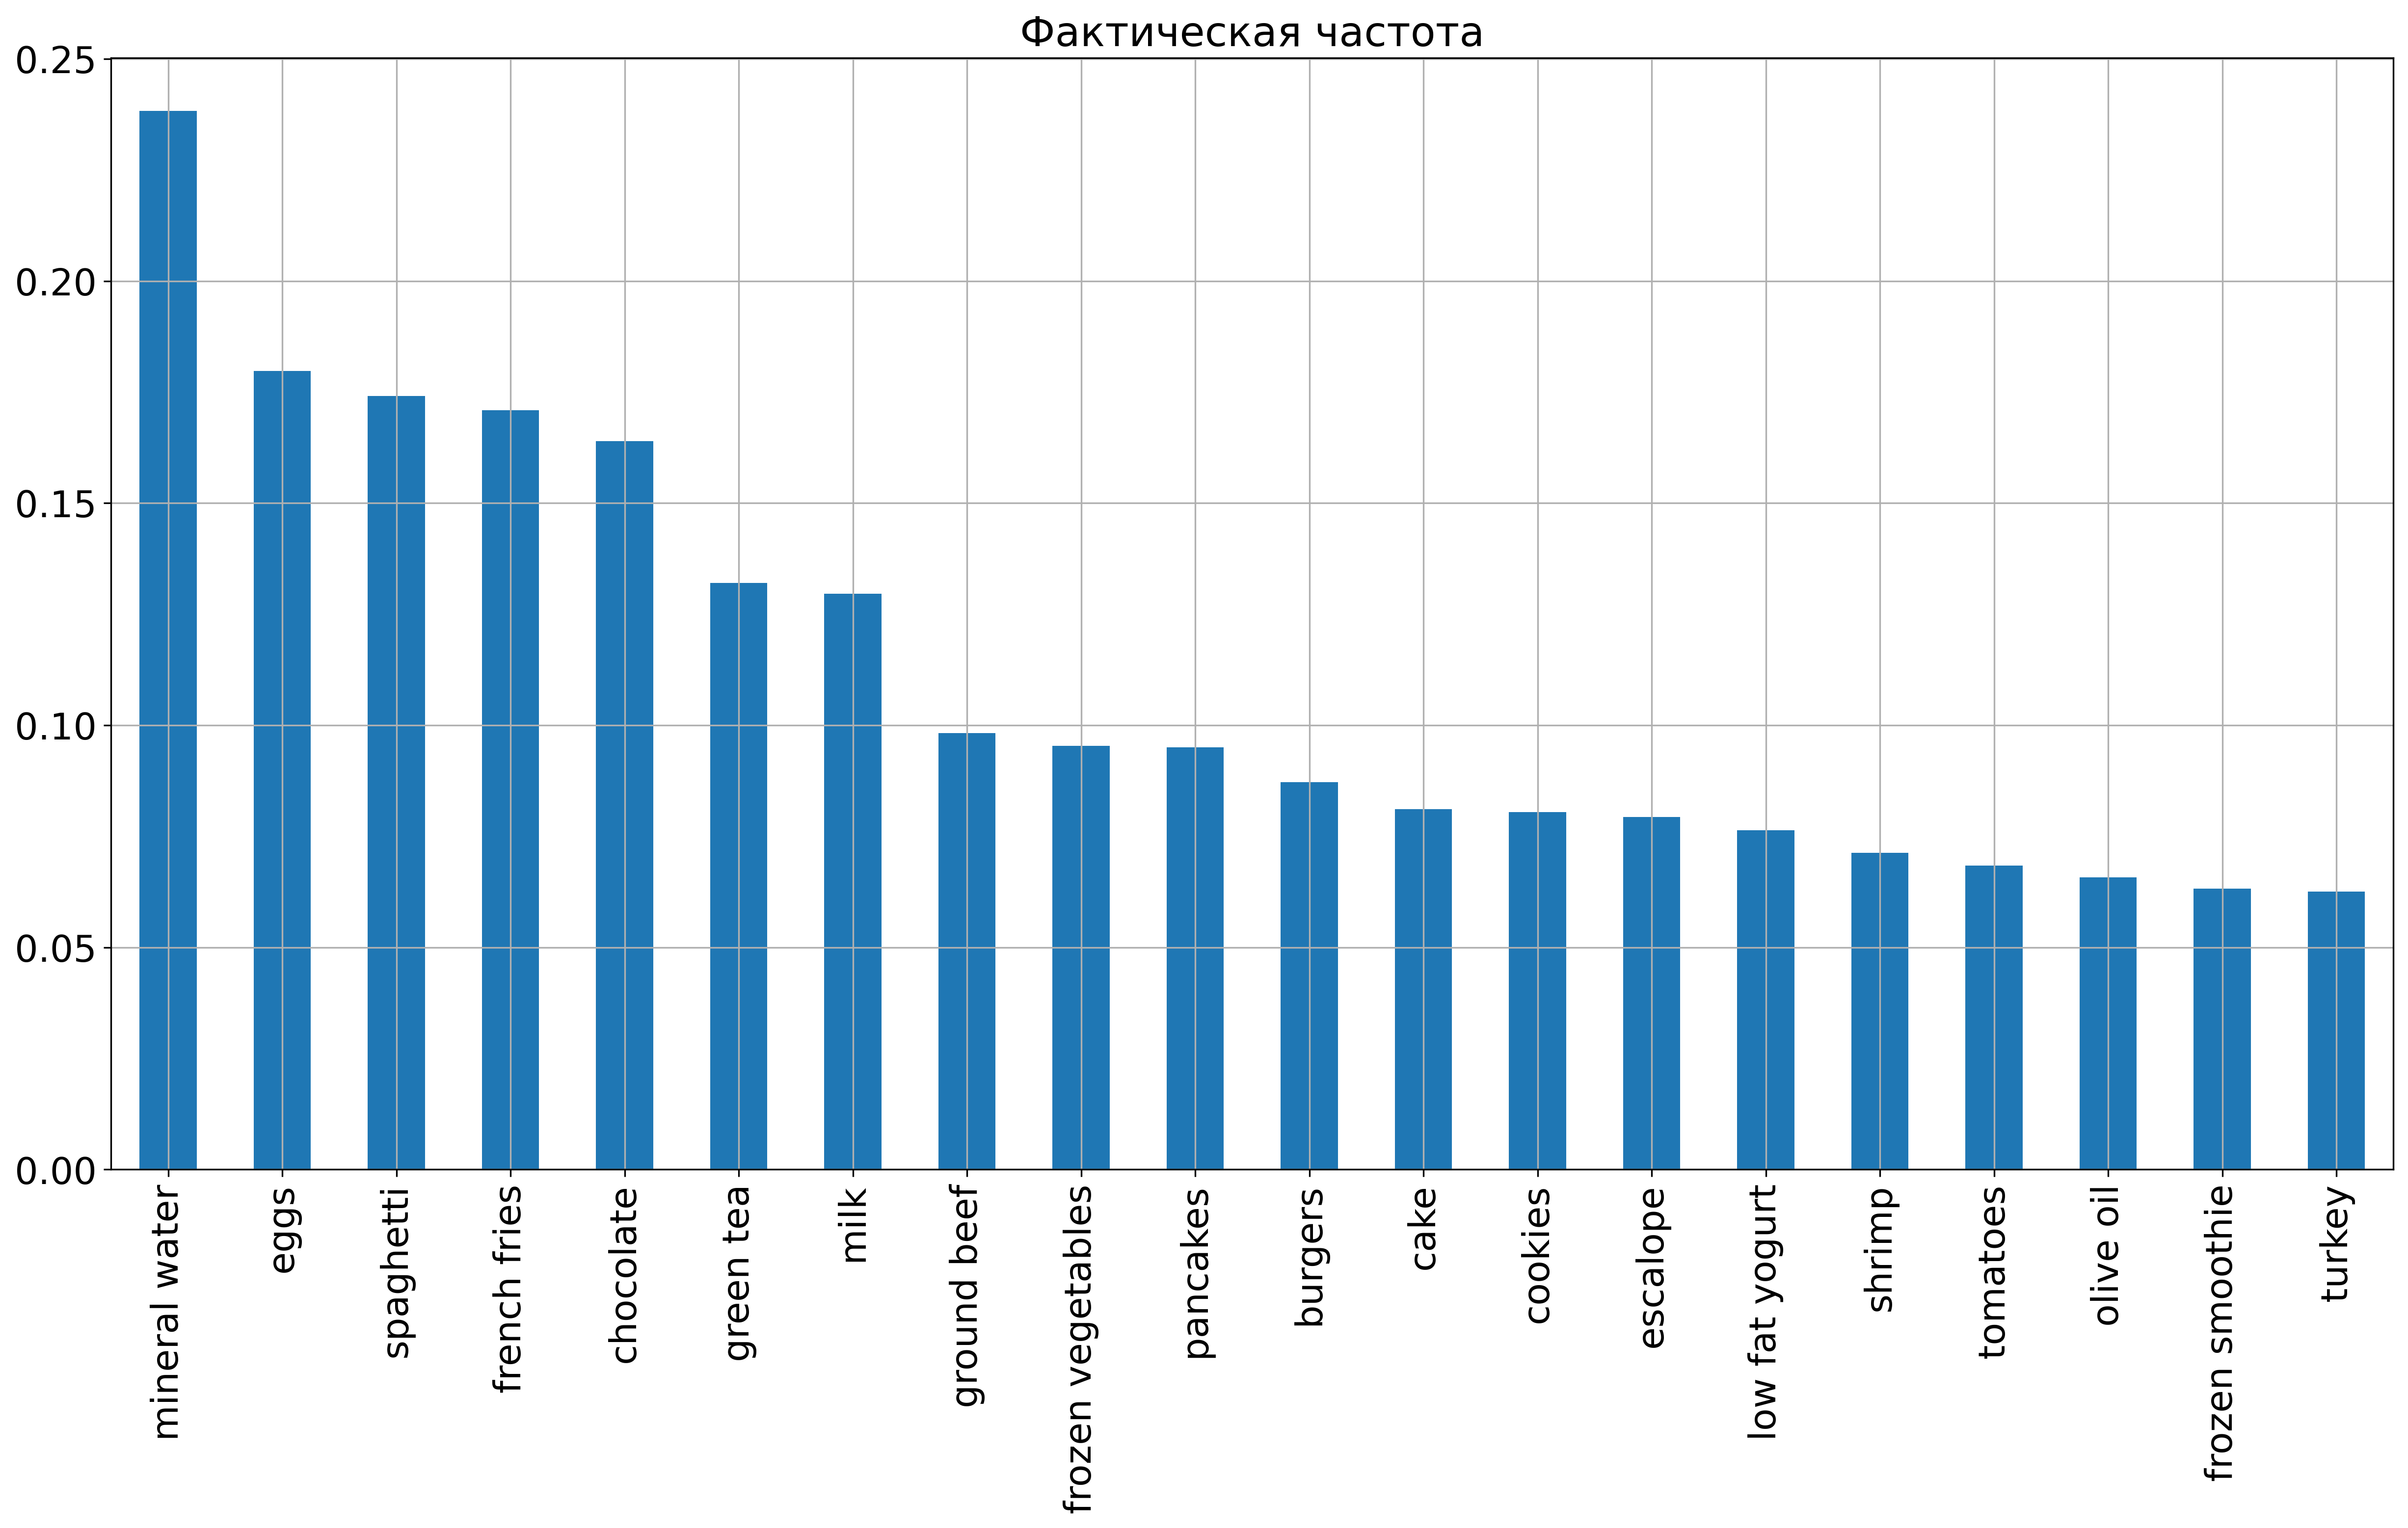

In [97]:
plt.figure(figsize=(20,10), dpi=300)
plt.xticks( size=18)
plt.yticks(size=18)
plt.title("Фактическая частота", size=20)
df.stack().value_counts().apply(lambda item: item/df.shape[0]).head(20).plot(kind='bar')
plt.grid()
plt.show()

In [13]:
pip install apriori_python

Применить алгоритм Apriori, используя 3 разные библиотеки (apriori_python, apyori, efficient_apriori). Значения Support = 0.04 и Confidence = 0.2, увеличение значений параметров приводит к отсутствию записей.

In [109]:
from apriori_python import apriori
import time

transactions = []
for i in range(df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    transactions.append(row)
start_time = time.time()
t1=[]
t,rules = apriori(transactions, minSup = 0.04, minConf = 0.2)
time1 = time.time() - start_time
t1.append(time1)
rules

[[{'mineral water'}, {'milk'}, 0.20145495243424735],
 [{'mineral water'}, {'eggs'}, 0.21376608841634023],
 [{'mineral water'}, {'chocolate'}, 0.22104085058757694],
 [{'mineral water'}, {'spaghetti'}, 0.2506994963626189],
 [{'eggs'}, {'mineral water'}, 0.28338278931750743],
 [{'chocolate'}, {'mineral water'}, 0.3213995117982099],
 [{'spaghetti'}, {'mineral water'}, 0.3430321592649311],
 [{'milk'}, {'mineral water'}, 0.37037037037037035],
 [{'ground beef'}, {'mineral water'}, 0.41655359565807326]]

In [19]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=30802045ba04078a78b5a7db4d599455af18e871297169b66fd036d339576da7
  Stored in directory: c:\users\1315475\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori



In [110]:
from apyori import apriori
start_time = time.time()
rules = apriori(transactions=transactions, min_support = 0.04, min_confidence=0.2,min_lift = 1.0001)
results = list(rules)
time2 = time.time() - start_time
t1.append(time2)
for result in results:
    for a in result[2]:
        print(a[0], a[1])
        print("Support: {0}; Confidence: {1}; Lift: {2};\n".format(result[1], a[2], a[3]))
        

frozenset({'chocolate'}) frozenset({'mineral water'})
Support: 0.05266666666666667; Confidence: 0.32139951179820997; Lift: 1.3489067367020564;

frozenset({'mineral water'}) frozenset({'chocolate'})
Support: 0.05266666666666667; Confidence: 0.22104085058757697; Lift: 1.3489067367020564;

frozenset({'eggs'}) frozenset({'mineral water'})
Support: 0.05093333333333333; Confidence: 0.28338278931750743; Lift: 1.1893513821383916;

frozenset({'mineral water'}) frozenset({'eggs'})
Support: 0.05093333333333333; Confidence: 0.21376608841634023; Lift: 1.1893513821383916;

frozenset({'ground beef'}) frozenset({'mineral water'})
Support: 0.040933333333333335; Confidence: 0.41655359565807326; Lift: 1.7482663499919135;

frozenset({'milk'}) frozenset({'mineral water'})
Support: 0.048; Confidence: 0.3703703703703704; Lift: 1.5544363613753656;

frozenset({'mineral water'}) frozenset({'milk'})
Support: 0.048; Confidence: 0.20145495243424735; Lift: 1.5544363613753656;

frozenset({'mineral water'}) frozenset

In [16]:
pip install efficient_apriori

In [111]:
from efficient_apriori import apriori
start_time = time.time()
itemsets, rules = apriori(transactions, min_support = 0.04, min_confidence = 0.2)
time3 = time.time() - start_time
t1.append(time3)
for i in range (len(rules)):
    print (rules[i])

{mineral water} -> {chocolate} (conf: 0.221, supp: 0.053, lift: 1.349, conv: 1.073)
{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.349, conv: 1.123)
{mineral water} -> {eggs} (conf: 0.214, supp: 0.051, lift: 1.189, conv: 1.043)
{eggs} -> {mineral water} (conf: 0.283, supp: 0.051, lift: 1.189, conv: 1.063)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.306)
{mineral water} -> {milk} (conf: 0.201, supp: 0.048, lift: 1.554, conv: 1.090)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.440, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.440, conv: 1.102)


In [10]:
pip install fpgrowth_py

Note: you may need to restart the kernel to use updated packages.


Применить алгоритм FP-Growth из библиотеки fpgrowth_py.

In [ ]:
from fpgrowth_py import fpgrowth
start_time = time.time()
itemsets, rules = fpgrowth(transactions, minSupRatio = 0.04, minConf = 0.2)
time4 = time.time() - start_time
t1.append(time4)
for i in range (len(rules)):
    print (rules[i])

In [ ]:
Сравнить время выполнения всех алгоритмов и построить гистограмму. 

In [113]:
dat = {'Время работы': [time1,time2, time3, time4], 
       'Библиотека': ['apriori_python','apyori', 'efficient_apriori', 'fpgrowth_py' ]}
dft = pd.DataFrame(dat)
dft

,Время работы,Библиотека
0,3.293922,apriori_python
1,0.108951,apyori
2,0.057714,efficient_apriori
3,0.890476,fpgrowth_py


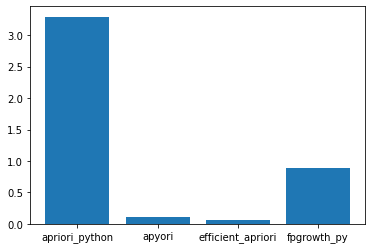

In [114]:
plt.bar(dft['Библиотека'],t1 )
plt.show()

На этом наборе данных наибольшее время показал алгоритм apriori_python, наименьшее – efficient_python.

Загрузить данные data.csv.

In [60]:
import pandas as pd
data = pd.read_csv('data.csv', sep=',')
df1 = pd.DataFrame(data)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9530 entries, 0 to 9529
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bread        9207 non-null   object
 1   Unnamed: 1   5840 non-null   object
 2   Unnamed: 2   2959 non-null   object
 3   Unnamed: 3   1505 non-null   object
 4   Unnamed: 4   596 non-null    object
 5   Unnamed: 5   245 non-null    object
 6   Unnamed: 6   91 non-null     object
 7   Unnamed: 7   36 non-null     object
 8   Unnamed: 8   13 non-null     object
 9   Unnamed: 9   9 non-null      object
 10  Unnamed: 10  4 non-null      object
 11  Unnamed: 11  1 non-null      object
dtypes: object(12)
memory usage: 893.6+ KB


In [61]:
df1

,Bread,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medialuna,Pastry,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9525,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9526,Truffles,Tea,Spanish Brunch,Christmas common,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9527,Muffin,Tacos/Fajita,Coffee,Tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9528,Coffee,Pastry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Визуализировать данные (отразить на гистограммах относительную и фактическую частоту встречаемости для 20 наиболее популярных товаров).

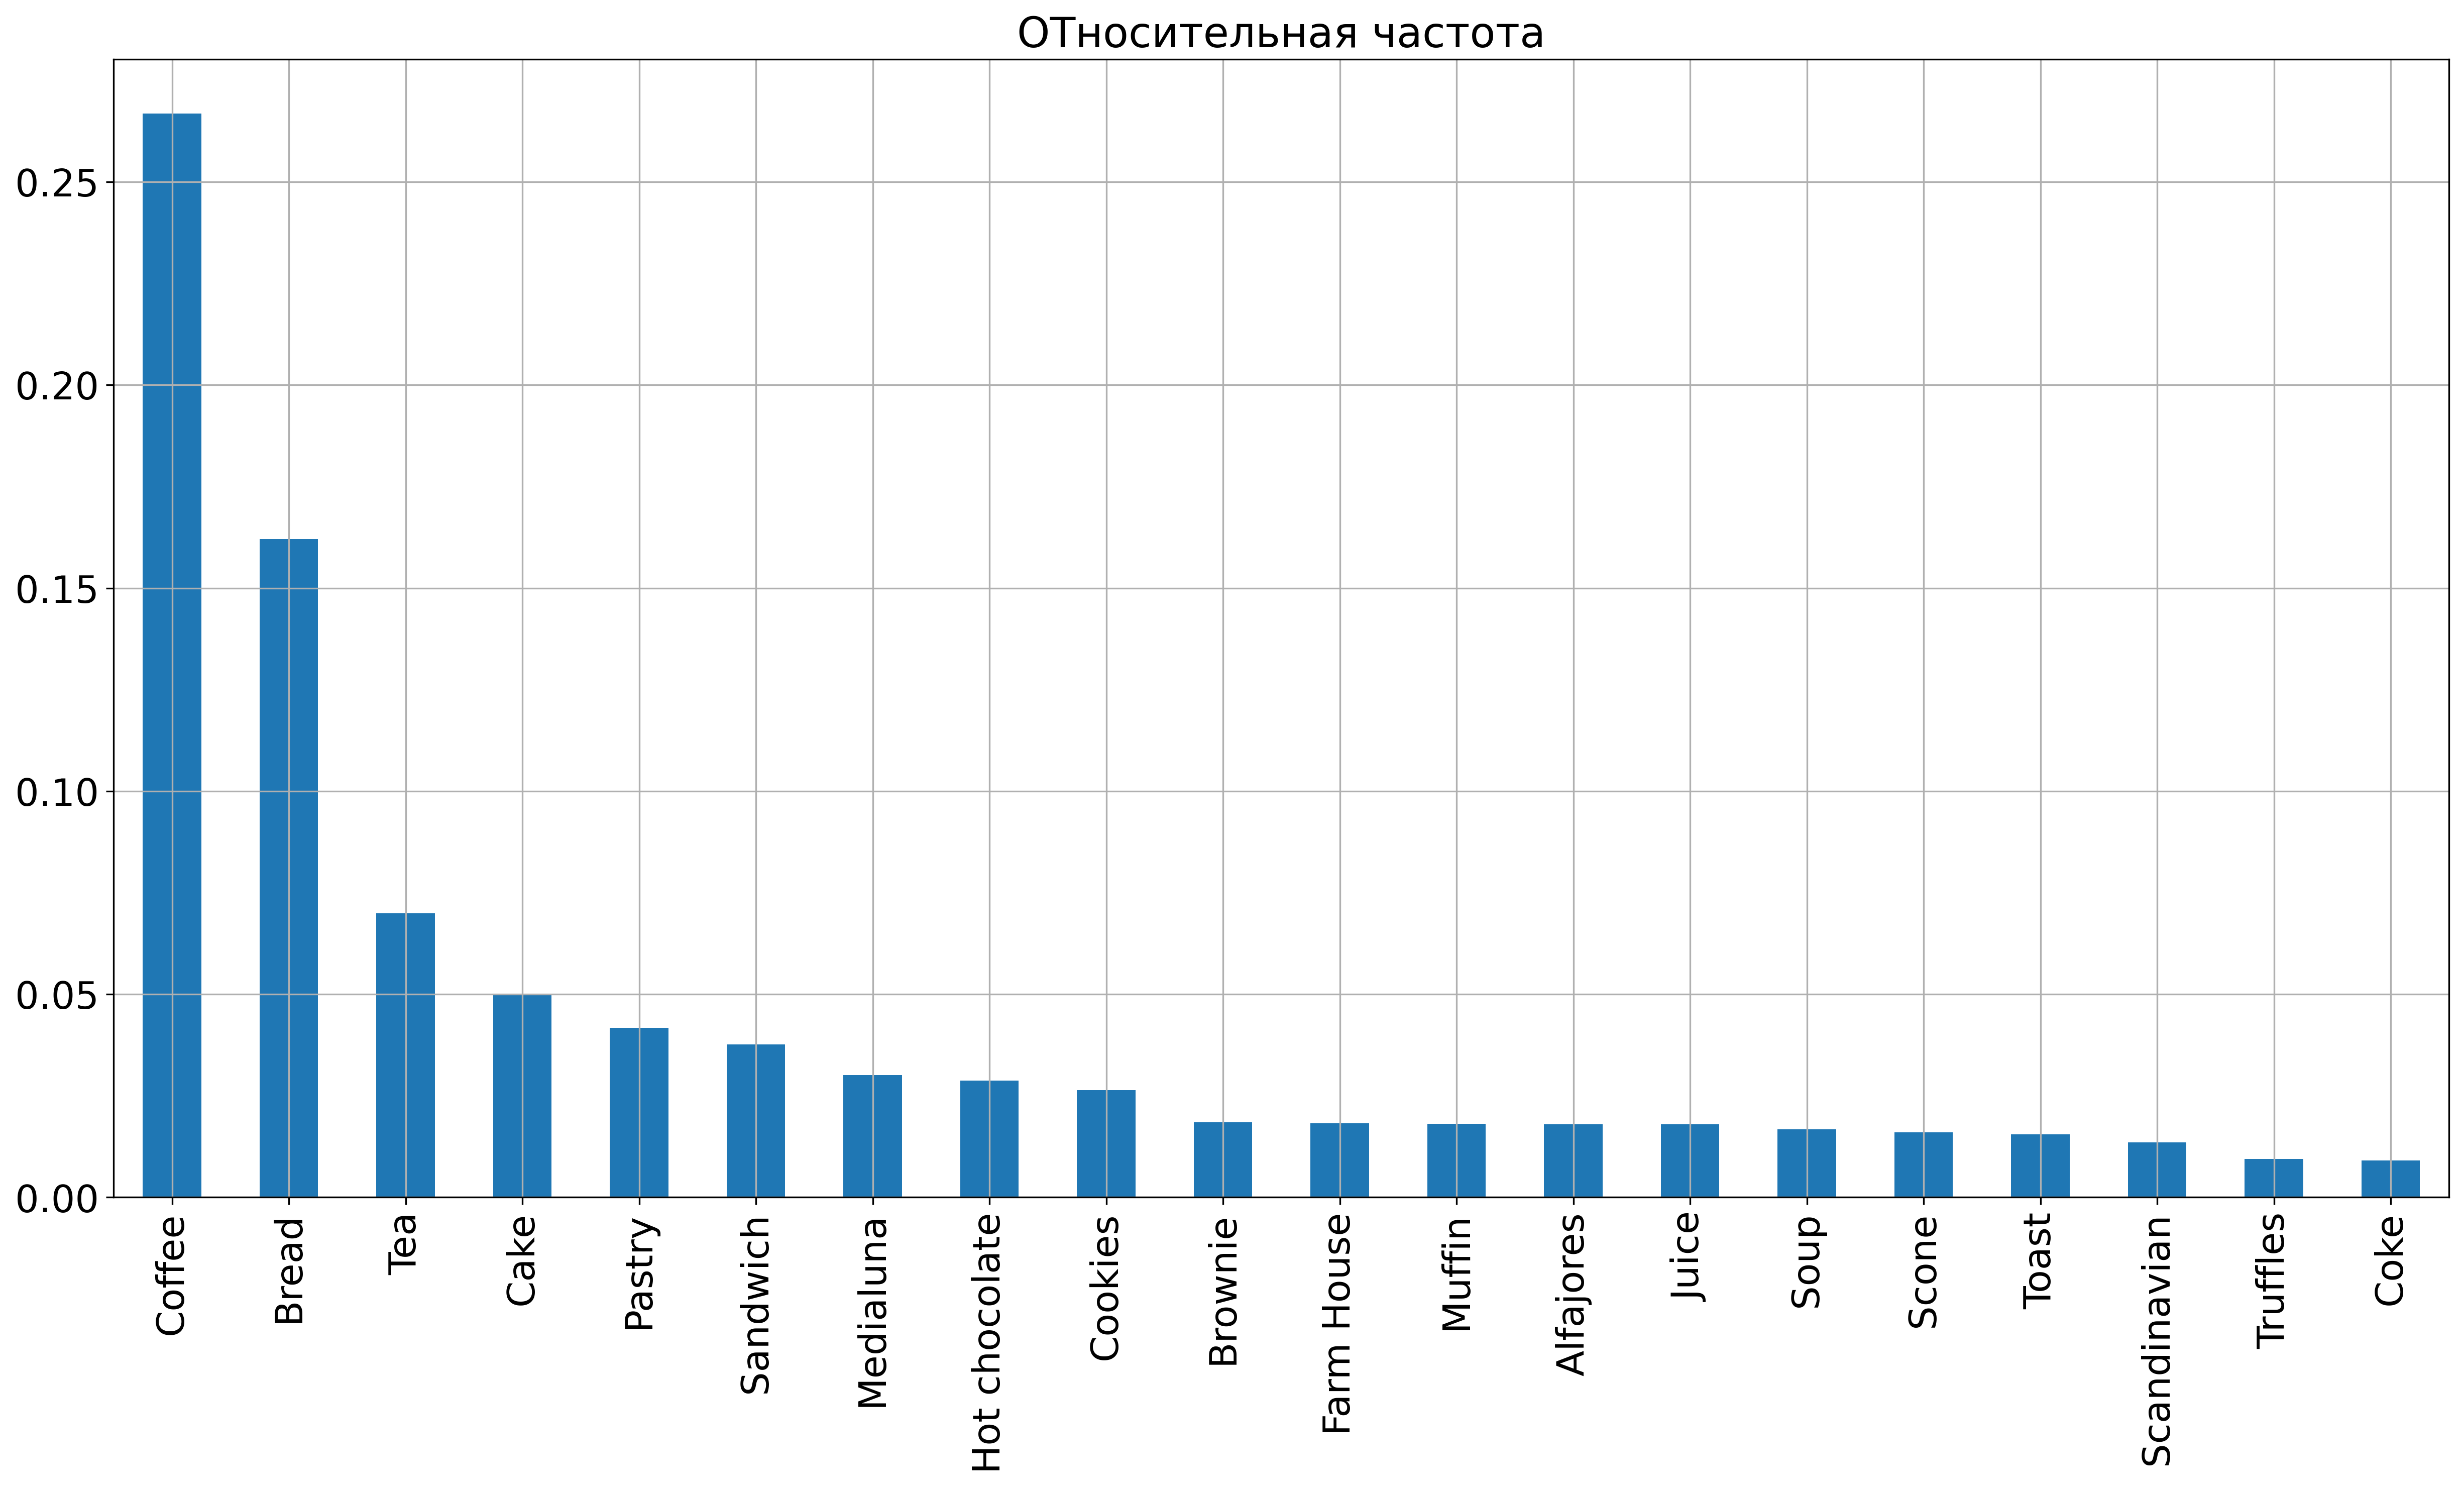

In [116]:
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(20,10), dpi=300)
plt.xticks( size=18)
plt.yticks(size=18)
plt.title("ОТносительная частота", size=20)
df1.stack().value_counts(normalize=True).head(20).plot(kind='bar')
plt.grid()
plt.show()

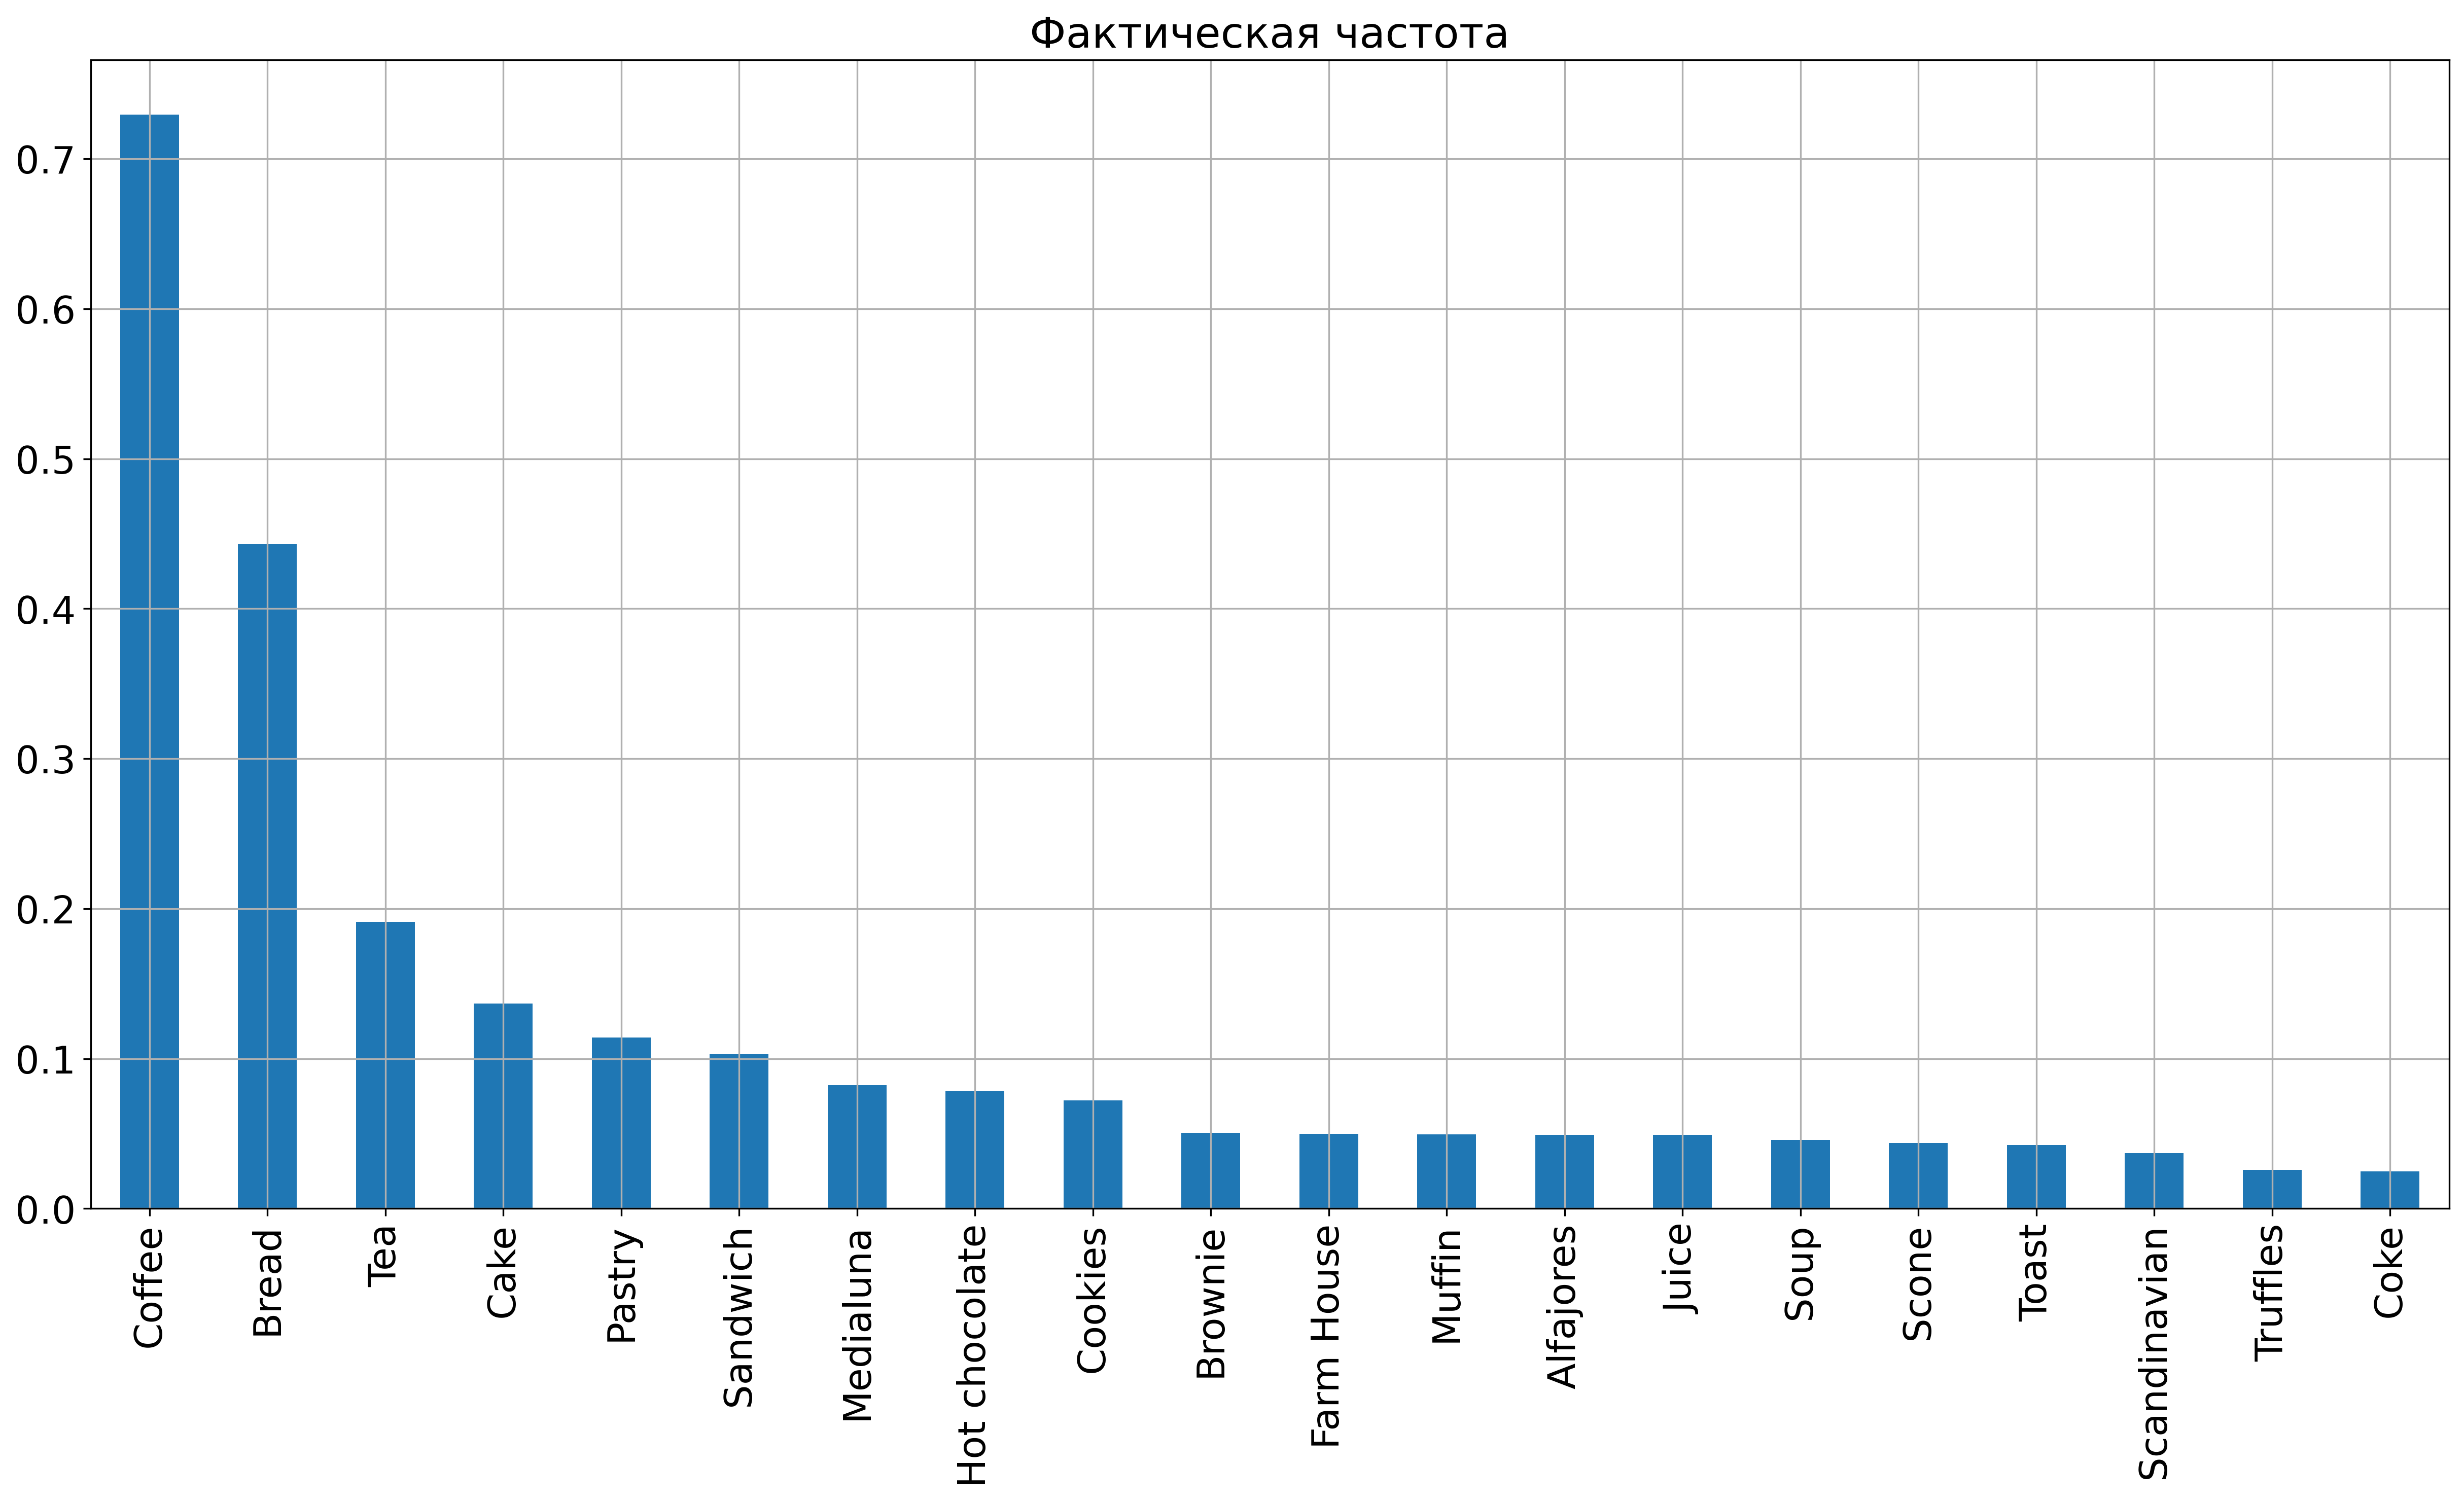

In [117]:
plt.figure(figsize=(20,10), dpi=300)
plt.xticks( size=18)
plt.yticks(size=18)
plt.title("Фактическая частота", size=20)
df1.stack().value_counts().apply(lambda item: item/df.shape[0]).head(20).plot(kind='bar')
plt.grid()
plt.show()

Применить алгоритм Apriori, используя 3 разные библиотеки (apriori_python, apyori, efficient_apriori).
Данные попадают в обработчик без нулевых значений.
Значения Support = 0.04 и Confidence = 0.3, увеличение значений параметров приводит к отсутствию записей.


In [64]:
transactions = []
for i in range(df.shape[0]):
    row = df1.iloc[i].dropna().tolist()
    transactions.append(row)
df1

,Bread,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medialuna,Pastry,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9525,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9526,Truffles,Tea,Spanish Brunch,Christmas common,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9527,Muffin,Tacos/Fajita,Coffee,Tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9528,Coffee,Pastry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
from apriori_python import apriori
import time
transactions = []
for i in range(df.shape[0]):
    row = df1.iloc[i].dropna().tolist()
    transactions.append(row)
start_time = time.perf_counter()
t2=[]
t,rules = apriori(transactions, minSup = 0.04, minConf = 0.3)
time11 = time.perf_counter() - start_time
t2.append(time11)
rules

[[{'Tea'}, {'Coffee'}, 0.34447539461467036],
 [{'Cake'}, {'Coffee'}, 0.5176304654442877],
 [{'Pastry'}, {'Coffee'}, 0.5537974683544303]]

In [76]:
from apyori import apriori
start_time = time.perf_counter()
rules = apriori(transactions=transactions, min_support = 0.04, min_confidence=0.3,min_lift = 1.0001)
results = list(rules)
time22 = time.perf_counter() - start_time
t2.append(time22)
for result in results:
    for a in result[2]:
        print(a[0], a[1])
        print("Support: {0}; Confidence: {1}; Lift: {2};\n".format(result[1], a[2], a[3]))
        

frozenset({'Cake'}) frozenset({'Coffee'})
Support: 0.048933333333333336; Confidence: 0.5176304654442878; Lift: 1.108574668998332;

frozenset({'Pastry'}) frozenset({'Coffee'})
Support: 0.04666666666666667; Confidence: 0.5537974683544303; Lift: 1.1860311286859588;



In [77]:
from efficient_apriori import apriori
start_time = time.perf_counter()
itemsets, rules = apriori(transactions, min_support = 0.04, min_confidence = 0.3)
time33 = time.perf_counter() - start_time
t2.append(time33)
for i in range (len(rules)):
    print (rules[i])

{Cake} -> {Coffee} (conf: 0.518, supp: 0.049, lift: 1.109, conv: 1.105)
{Pastry} -> {Coffee} (conf: 0.554, supp: 0.047, lift: 1.186, conv: 1.195)
{Tea} -> {Coffee} (conf: 0.344, supp: 0.049, lift: 0.738, conv: 0.813)


Применить алгоритм FP-Growth из библиотеки fpgrowth_py.

In [78]:
from fpgrowth_py import fpgrowth
start_time = time.perf_counter()
itemsets, rules = fpgrowth(transactions, minSupRatio = 0.04, minConf = 0.3)
time44 = time.perf_counter() - start_time
t2.append(time44)
for i in range (len(rules)):
    print (rules[i])

[{'Sandwich'}, {'Coffee'}, 0.5050505050505051]
[{'Medialuna'}, {'Coffee'}, 0.553030303030303]
[{'Pastry'}, {'Coffee'}, 0.5537974683544303]
[{'Cake'}, {'Coffee'}, 0.5176304654442877]
[{'Tea'}, {'Coffee'}, 0.34447539461467036]


Сравнить время выполнения всех алгоритмов и построить гистограмму.

In [80]:
dat1 = {'Время работы': [time11,time22, time33, time44], 
        'Библиотека': ['apriori_python','apyori', 'efficient_apriori', 'fpgrowth_py' ]}
dft1 = pd.DataFrame(dat1)
dft1

,Время работы,Библиотека
0,0.682814,apriori_python
1,0.042478,apyori
2,0.022176,efficient_apriori
3,0.386316,fpgrowth_py


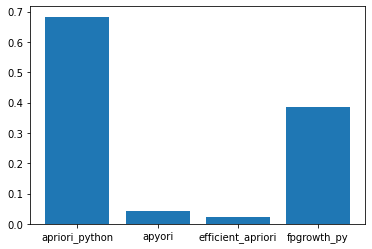

In [81]:
plt.bar(dft1['Библиотека'],t2 )
plt.show()

На этом наборе данных наибольшее время показал алгоритм, решенный через библиотеку apriori_python, наименьшее – efficient_python.

В обоих исследованиях медленнее всех сработал Apriory из библиотеки apriori_python, быстрее - efficient_python. Алгоритм FP-Growth показал средние результаты. Во втором исследовании в библиотеке apyori, алгоритм находил меньше записей, чем остальные. Среди остальных результатов все выведенные записи одинаковые, а FP-Growth смог найти еще записи с уровнем Confidence, превосходящим найденные через алгоритм Apriori. 
В первом исследовании все найденные записи совпадают в каждой реализации. Вывод говорит о примерно одинаковом качестве всех исследуемых методов, различия проявляются во времени выполнения.